<a href="https://colab.research.google.com/github/Bkoder/PythonML/blob/main/netflix_deep_analysis_reveals_streaming_secrets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Cleaning the Data For Analysis
1. Missing values
2. Duration col
3. Multiple values in in single row
4. date_added not in datetime format

In [ ]:
df = df.drop_duplicates(keep = 'first').reset_index(drop = True)

In [ ]:
df.loc[df['rating'].str.split(' ').str.get(1) == 'min', 'duration'] = df[df['rating'].str.split(' ').str.get(1) == 'min']['rating']
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df.loc[df['rating'].str.split(' ').str.get(1) == 'min', 'rating'] = None

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df['date_added'] = df['date_added'].astype('datetime64')
mean_val = df['date_added'].mean()
df['date_added'].fillna(value = mean_val, inplace = True)

In [ ]:
df['rating'].fillna(df['rating'].mode()[0], inplace = True)

In [ ]:
df['duration'] = df['duration'].str.split(' ').str.get(0)
df['duration'] = df['duration'].astype(float)


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df_json = df.to_dict(orient = "records")

In [ ]:
df_director = []
for x in df_json:
  title = x['title']
  directors = x['director']

  if str(directors) == 'nan':
    directors = 'no director'

  for c in directors.split(','):
    c = c.strip()
    obj = {}
    obj['title'] = title
    obj['director'] = c
    df_director.append(obj)

df_director = pd.DataFrame(df_director)
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,no director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,no director
4,Kota Factory,no director
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,no director
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
df_cast = []
for x in df_json:
  title = x['title']
  casts = x['cast']

  if str(casts) == 'nan':
    casts = 'no cast'

  for c in casts.split(','):
    c = c.strip()
    obj = {}
    obj['title'] = title
    obj['cast'] = c
    df_cast.append(obj)

df_cast = pd.DataFrame(df_cast)
df_cast

,title,cast
0,Dick Johnson Is Dead,no cast
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
df_country = []
for x in df_json:
  title = x['title']
  countrys = x['country']

  if str(countrys) == 'nan':
    countrys = 'no country'

  for c in countrys.split(','):
    c = c.strip()
    obj = {}
    obj['title'] = title
    obj['country'] = c
    df_country.append(obj)

df_country = pd.DataFrame(df_country)
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,no country
3,Jailbirds New Orleans,no country
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,no country
10847,Zombieland,United States
10848,Zoom,United States


In [ ]:
df_listed = []
for x in df_json:
  title = x['title']
  listed = x['listed_in']

  if str(listed) == 'nan':
    listed = 'not listed'

  for c in listed.split(','):
    c = c.strip()
    obj = {}
    obj['title'] = title
    obj['listed_in'] = c
    df_listed.append(obj)

df_listed = pd.DataFrame(df_listed)
df_listed

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [ ]:
df1 = pd.merge(df_director, df_cast, on = 'title')
df2 = pd.merge(df1, df_country, on = 'title')
df3 = pd.merge(df2, df_listed, on = 'title')
df3

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,no cast,United States,Documentaries
1,Blood & Water,no director,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,no director,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,no director,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,no director,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
updated_df = pd.merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'description']], df3, on = 'title')
updated_df

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90.0,"As her father nears the end of his life, filmm...",Kirsten Johnson,no cast,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",no director,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",no director,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",no director,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",no director,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,International Movies
202061,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
len(df), len(updated_df)

(8807, 202065)

In [ ]:
updated_df = updated_df.drop_duplicates(keep = 'first').reset_index(drop = True)

In [ ]:
updated_df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
director        0
cast            0
country         0
listed_in       0
dtype: int64

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202010 entries, 0 to 202009
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202010 non-null  object        
 1   type          202010 non-null  object        
 2   title         202010 non-null  object        
 3   date_added    202010 non-null  datetime64[ns]
 4   release_year  202010 non-null  int64         
 5   rating        202010 non-null  object        
 6   duration      202010 non-null  float64       
 7   description   202010 non-null  object        
 8   director      202010 non-null  object        
 9   cast          202010 non-null  object        
 10  country       202010 non-null  object        
 11  listed_in     202010 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 18.5+ MB


# 1. Defining Problem Statement and Analysing basic metrics

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries by observing insights like

1. Which genre is best
2. Which actor with highest number of movies / TV Shows
3. Director with highest number of movies / TV Shows
4. Understanding what content is available in different countries
5. Does Netflix has more focus on TV Shows than movies in recent years.

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
print('No of rows before preprocessing,', df.shape[0], 'No of rows After preprocessing', updated_df.shape[0])
print('No of cols before preprocessing,', df.shape[1], 'No of cols After preprocessing', updated_df.shape[1])

No of rows before preprocessing, 8807 No of rows After preprocessing 202010
No of cols before preprocessing, 12 No of cols After preprocessing 12


In [ ]:
#columns datatype
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202010 entries, 0 to 202009
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202010 non-null  object        
 1   type          202010 non-null  object        
 2   title         202010 non-null  object        
 3   date_added    202010 non-null  datetime64[ns]
 4   release_year  202010 non-null  int64         
 5   rating        202010 non-null  object        
 6   duration      202010 non-null  float64       
 7   description   202010 non-null  object        
 8   director      202010 non-null  object        
 9   cast          202010 non-null  object        
 10  country       202010 non-null  object        
 11  listed_in     202010 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 18.5+ MB


## Following columns have missing values
1. Director -> As their is a possibility of having 0 directors, So its been replaced by "No Director"
2. Cast -> As their is a possibility of having 0 casts like in animated movies, So its been replaced by "No Cast"
3. Country -> As their is a possibility of having no Country release, So its been replaced by "No Country"
4. date_added -> It is replaced by Mean
5. rating -> As it is a categorical data it is replaced by mode


In [ ]:
pd.DataFrame([df.isna().sum(), updated_df.isna().sum()])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,0,2634,825,831,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
pd.DataFrame(df['type'].value_counts())

,type
Movie,6131
TV Show,2676


In [ ]:
pd.DataFrame(df_director['director'].value_counts())

,director
no director,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
...,...
Raymie Muzquiz,1
Stu Livingston,1
Joe Menendez,1
Eric Bross,1


In [ ]:
pd.DataFrame(df_cast['cast'].value_counts())

,cast
no cast,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
...,...
Melanie Straub,1
Gabriela Maria Schmeide,1
Helena Zengel,1
Daniel Valenzuela,1


In [ ]:
pd.DataFrame(df_country['country'].value_counts())

,country
United States,3690
India,1046
no country,831
United Kingdom,806
Canada,445
...,...
Ecuador,1
Armenia,1
Mongolia,1
Bahamas,1


In [ ]:
pd.DataFrame(df['date_added'].value_counts())

,date_added
2020-01-01,110
2019-11-01,91
2018-03-01,75
2019-12-31,74
2018-10-01,71
...,...
2017-02-21,1
2017-02-07,1
2017-01-29,1
2017-01-25,1


In [ ]:
pd.DataFrame(df['release_year'].value_counts())

,release_year
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1
1947,1


In [ ]:
pd.DataFrame(df['rating'].value_counts())

,rating
TV-MA,3214
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220
NR,80


In [ ]:
pd.DataFrame(df['duration'].value_counts())

,duration
1.0,1793
2.0,425
3.0,200
90.0,152
94.0,146
...,...
189.0,1
273.0,1
212.0,1
224.0,1


In [ ]:
pd.DataFrame(df_listed['listed_in'].value_counts())

,listed_in
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

## 4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

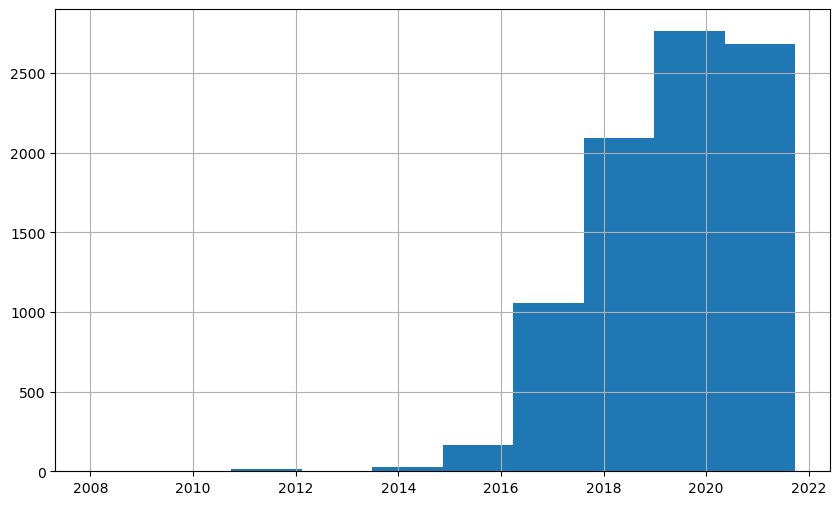

In [ ]:
plt.figure(figsize=(10, 6))
df['date_added'].hist()
plt.show()

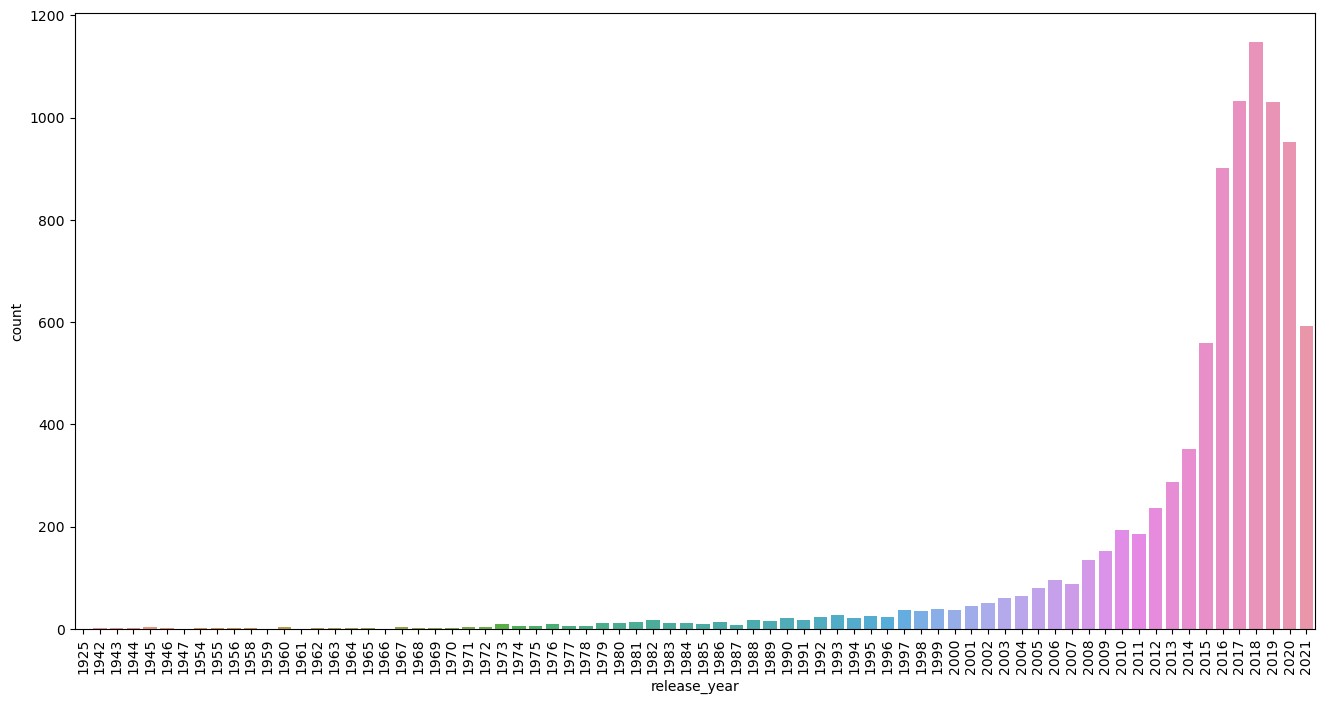

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x ='release_year', data = df)
plt.xticks(rotation = 90)
plt.show()

## 4.2 For categorical variable(s): Boxplot

<AxesSubplot:xlabel='rating', ylabel='duration'>

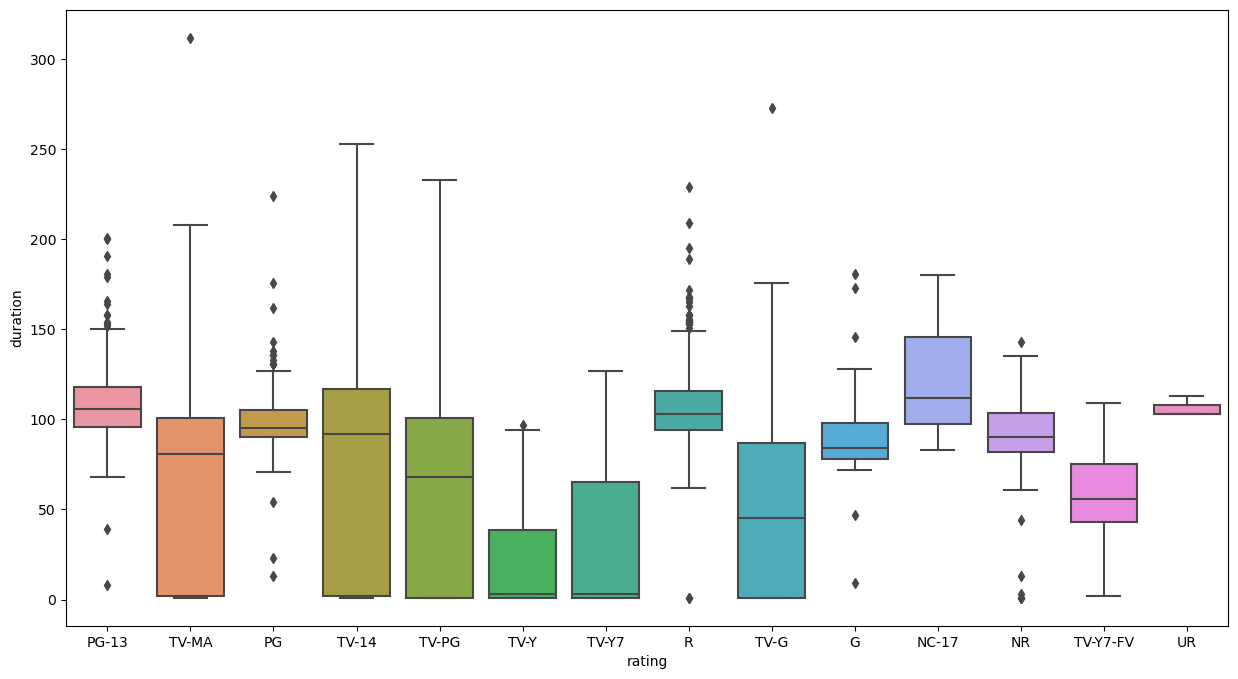

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['rating'], y = df['duration'])

<AxesSubplot:xlabel='type', ylabel='duration'>

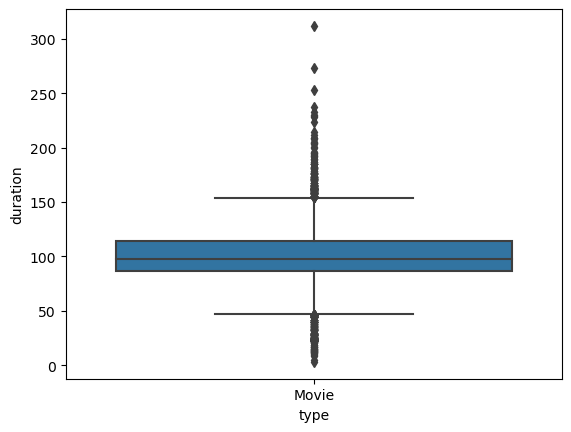

In [ ]:
# plt.figure(figsize=(15,8))
sns.boxplot(x = df.loc[df['type'] == 'Movie', 'type'], y = df['duration'])

<AxesSubplot:xlabel='type', ylabel='duration'>

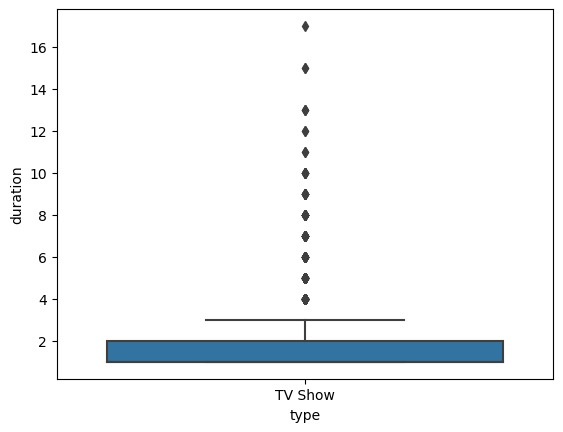

In [ ]:
# plt.figure(figsize=(15,8))
sns.boxplot(x = df.loc[df['type'] == 'TV Show', 'type'], y = df['duration'])

## 4.3 For correlation: Heatmaps, Pairplots

<AxesSubplot:>

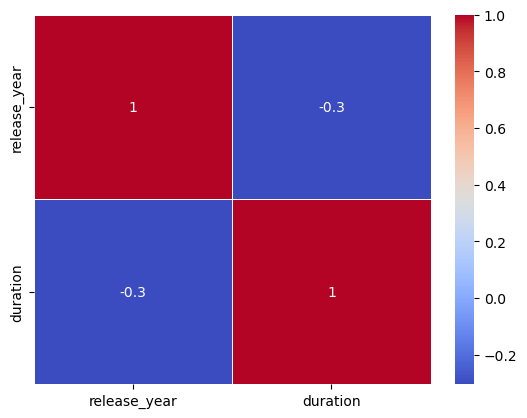

In [ ]:
sns.heatmap( updated_df.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm' )


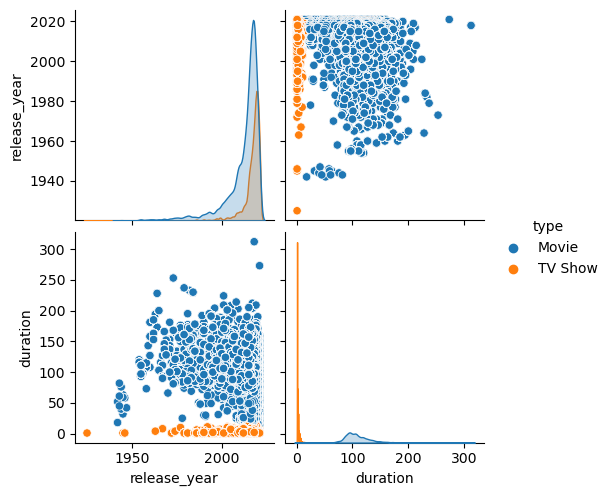

In [ ]:
sns.pairplot(updated_df, hue = 'type')

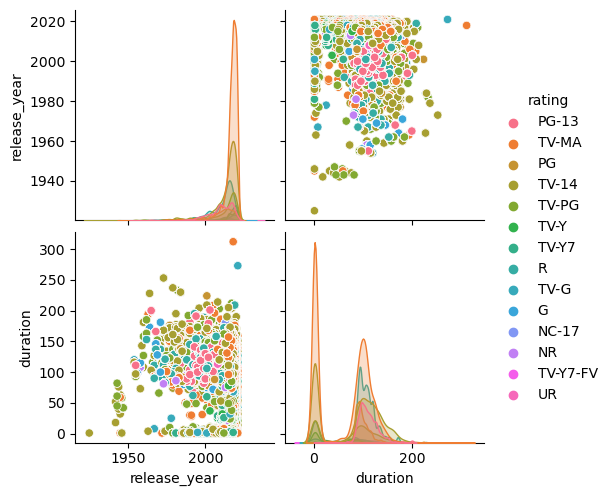

In [ ]:
sns.pairplot(updated_df, hue = 'rating')

# 5. Missing Value & Outlier check

---

1. Director -> As their is a possibility of having 0 directors, So its been replaced by "No Director"
2. Cast -> As their is a possibility of having 0 casts like in animated movies, So its been replaced by "No Cast"
3. Country -> As their is a possibility of having no Country release, So its been replaced by "No Country"
4. date_added -> It is replaced by Mean as  (2019-05-17 05:59:08.436967168)
5. rating -> As it is a categorical data it is replaced by mode (TV-MA)




In [ ]:
df['date_added'].mean()

Timestamp('2019-05-17 05:59:08.436967168')

In [ ]:
df['rating'].mode()

0    TV-MA
dtype: object

In [ ]:
data = pd.DataFrame([df.isna().sum(), updated_df.isna().sum()], index = ['Before Preprocessing', 'After Preprocessing'])
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
Before Preprocessing,0,0,0,2634,825,831,0,0,0,0,0,0
After Preprocessing,0,0,0,0,0,0,0,0,0,0,0,0


# 6. Insights based on Non-Graphical and Visual Analysis

## 6.1 Comments on the range of attributes

In [ ]:
# Top 3 directors with most number of movies / Tv shows

df_director['director'].value_counts()[:4]

no director      2634
Rajiv Chilaka      22
Jan Suter          21
Raúl Campos        19
Name: director, dtype: int64

In [ ]:
# Top 3 actors with most number of movies/ TV shows

df_cast['cast'].value_counts()[:4]

no cast           825
Anupam Kher        43
Shah Rukh Khan     35
Julie Tejwani      33
Name: cast, dtype: int64

In [ ]:
# Top 3 countries with most number of movies/ TV shows

df_country['country'].value_counts()[:4]

United States     3690
India             1046
no country         831
United Kingdom     806
Name: country, dtype: int64

In [ ]:
# Top 3 rating for most number of movies/ TV shows

df['rating'].value_counts()[:3]

TV-MA    3214
TV-14    2160
TV-PG     863
Name: rating, dtype: int64

In [ ]:
# Top 3 genre with most number of movies

df_listed['listed_in'].value_counts()[:3]

International Movies    2752
Dramas                  2427
Comedies                1674
Name: listed_in, dtype: int64

## 6.2 Comments on the distribution of the variables and relationship between them

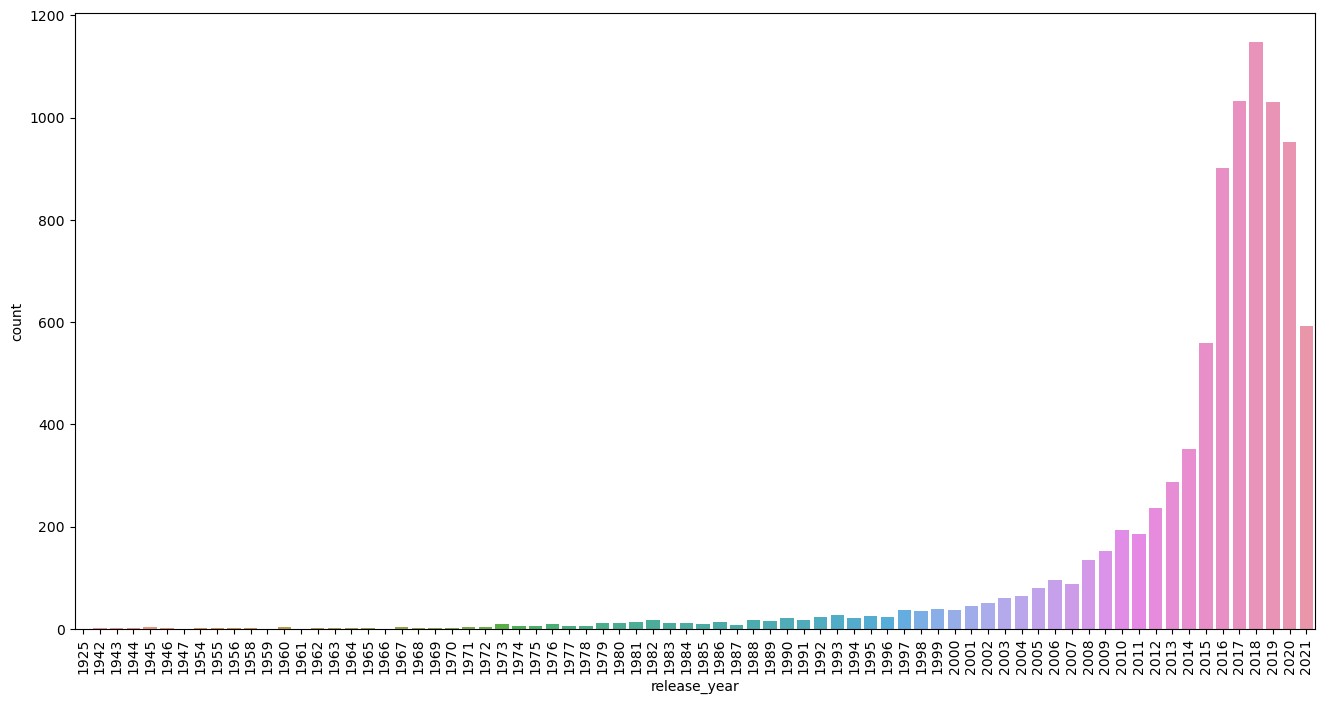

In [ ]:
# number of movies per year are incresing each year

plt.figure(figsize=(16, 8))
sns.countplot(x ='release_year', data = df)
plt.xticks(rotation = 90)
plt.show()

# Due to pandamic occured in 2019-2022 their is a fall in movie productions.

In [ ]:
# mean, max, min duration of movies

# -------For TV Shows in seasons-------

Tv_mean = df.loc[df['type'] == 'TV Show', 'duration'].mean()
Tv_max = df.loc[df['type'] == 'TV Show', 'duration'].max()
Tv_min = df.loc[df['type'] == 'TV Show', 'duration'].min()

# -------For Movies in Minutes------- '

Mov_mean = df.loc[df['type'] == 'Movie', 'duration'].mean()
Mov_max = df.loc[df['type'] == 'Movie', 'duration'].max()
Mov_min = df.loc[df['type'] == 'Movie', 'duration'].min()

print(' -------For TV Shows in seasons------- ')
print('Tv show mean -> ', Tv_mean, '| Tv show max -> ', Tv_max, '| Tv show min -> ', Tv_min)
print()
print(' -------For Movies in Minutes------- ')
print('Movies mean -> ', Mov_mean, '| Movies max -> ', Mov_max, '| Movies min -> ', Mov_min)


 -------For TV Shows in seasons------- 
Tv show mean ->  1.764947683109118 | Tv show max ->  17.0 | Tv show min ->  1.0

 -------For Movies in Minutes------- 
Movies mean ->  99.56499755341706 | Movies max ->  312.0 | Movies min ->  3.0


In [ ]:
# what mode, max, min rating

df['rating'].mode()[0], df['rating'].max(), df['rating'].min()

('TV-MA', 'UR', 'G')

In [ ]:
# which country watches most movies?

df_country['country'].value_counts()[:1]

United States    3690
Name: country, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='duration'>

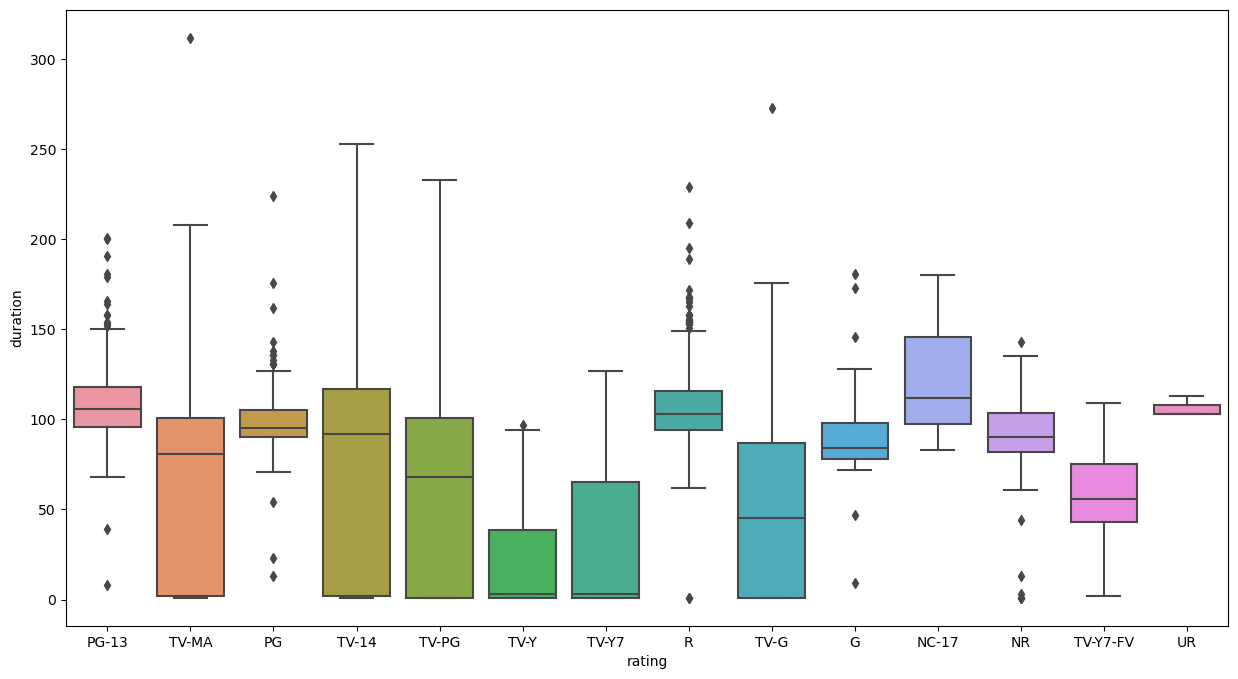

In [ ]:
# Plot duratin vs ratings [boxplot] - which ratings has lowest median durating

plt.figure(figsize=(15,8))
sns.boxplot(x = df['rating'], y = df['duration'])

# From below box plot the median of TV-Y, TV-Y7 has less medain as their may be have more outliers

<AxesSubplot:>

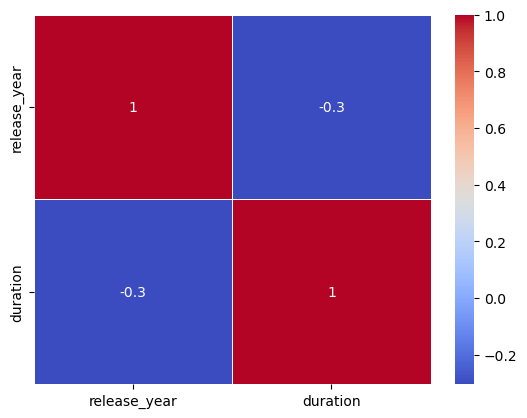

In [ ]:
# duration of movies/tv_shows is reducing as time/years are increasing - observed from correlation heatmap

sns.heatmap( updated_df.corr() , annot=True,linewidth = 0.5 , cmap = 'coolwarm' )


## 6.3 Comments for each univariate and bivariate plot



1. As years are going new movies are adding
2. Average Duration of seasons for TV SHOWS is 1.76
3. Average Duration for MOVIES in Minutes is 99.56
4. Duration of movies/tv_shows is reducing as time/years are increasing - observed from correlation heatmap
5. The median of TV-Y, TV-Y7 has less medain as their may be have more outliers

# 7. Business Insights - Should include patterns observed in the data along with what you can infer from it

In [ ]:
# best director according to number of movies
directors = pd.merge(df[['title', 'type']], df_director, on = 'title')
directors.loc[directors['type'] == 'Movie', 'director'].value_counts()[:3]

no director      188
Rajiv Chilaka     22
Jan Suter         21
Name: director, dtype: int64

In [ ]:
# best director according to number of movies
directors.loc[directors['type'] == 'TV Show', 'director'].value_counts()[:3]

no director            2446
Alastair Fothergill       3
Ken Burns                 3
Name: director, dtype: int64

In [ ]:
# most viewed genre
df_listed['listed_in'].value_counts()[:3]

International Movies    2752
Dramas                  2427
Comedies                1674
Name: listed_in, dtype: int64

In [ ]:
# best actor according to number of movies
actors = pd.merge(df[['title', 'type']], df_cast, on = 'title')
actors.loc[actors['type'] == 'Movie', 'cast'].value_counts()[:4]

no cast             475
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Name: cast, dtype: int64

In [ ]:
# best actor according to number of TV Shows
actors.loc[actors['type'] == 'TV Show', 'cast'].value_counts()[:4]

no cast             350
Takahiro Sakurai     25
Yuki Kaji            19
Daisuke Ono          17
Name: cast, dtype: int64

In [ ]:
df_country['country'].value_counts()[:4]

United States     3690
India             1046
no country         831
United Kingdom     806
Name: country, dtype: int64

In [ ]:
# Understanding what content is available in different countries

data = pd.merge(df_country, df_listed, on = 'title')
content = data.groupby('country')[['listed_in']].aggregate(
    content = ('listed_in', 'max')
).reset_index()

content

,country,content
0,,TV Dramas
1,Afghanistan,International Movies
2,Albania,International Movies
3,Algeria,International Movies
4,Angola,International Movies
...,...,...
119,Venezuela,Thrillers
120,Vietnam,Thrillers
121,West Germany,Thrillers
122,Zimbabwe,Romantic Movies


In [ ]:
content.loc[(content['country'] == 'United States') | (content['country'] == 'India') | (content['country'] == 'United Kingdom')]

,country,content
46,India,Thrillers
115,United Kingdom,Thrillers
116,United States,Thrillers


In [ ]:
# best director  [most ratings, most movies]
# most viewed genre  [most ratings, most movies]
# best actor - [most ratings, most movies]
# number of movies per year are incresing each year

# diferentiate director, actors based on tv_show/ movie
# which country watches most movies? netflix should release more movies in these places.
#

# 8. Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1. Rajiv Chilaka, Jan Suter are considered as best directors according to more number of Movie releases i.e 22, 21 respectively. So these directors movies could help in grow bussiness for netflix

2. Alastair Fothergill, Ken Burns are considered as best directors according to more number of TV Show releases i.e 3, 3 respectively. So these directors TV Shows are benificial to the Netflix bussiness
3. International Movies (2752), Dramas (2427),
Comedies (1674), are mostly viewed genre in Netflix, So movies with these genre has more demand
4. Anupam Kher (42), Shah Rukh Khan (35), Naseeruddin Shah(32) are the best actors according to most number of movie releases and has good fan base, So these actors movies could help grow bussiness
5. Takahiro Sakurai (25), Yuki Kaji (19), Daisuke Ono (17) are the best actors according to most number of TV SHow releases, So these actors TV Show help build bussiness.
6. United States (3690), India (1046), United Kingdom (806) these countries have the highest releases. So their is no risk of amount burn either in marketing or sales coz its already done.
7. Due to pandamic occured in 2019-2022 their is a fall in movie productions.
